## Spring 2019 Observing Proposals ##

* KPNO survey
* KPNO regular
* INT 

make this proposal about CO sample

In [63]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from astropy.io import fits
from astropy.coordinates import SkyCoord
from astropy import units as u
import warnings
warnings.filterwarnings('ignore')

from astropy.coordinates import ICRS, SkyCoord
from astropy import units as u

virgo_redshift = 0.0036 # from NED
dist_mod = 5.*np.log10(virgo_redshift*3.e5/70.*1.e6)-5

In [64]:
tablepath = '/Users/rfinn/github/Virgo/tables/'
nsafile=tablepath+'nsa.virgo.fits'
nsa=fits.getdata(nsafile)
# read in WISE catalog
wisefile=tablepath+'nsa_wise.virgo.fits'
wise=fits.getdata(wisefile)
# read in John's stellar masses
massfile=tablepath+'nsa_mstar.virgo.fits'
jmass=fits.getdata(massfile)
nsaco = fits.getdata(tablepath+'nsa_CO-Gianluca.virgo.fits')
nsacoflag = (nsaco.CO == 'L') | (nsaco.CO == 'O')
nsadict=dict((a,b) for a,b in zip(nsa.NSAID,np.arange(len(nsa.NSAID))))

In [65]:
co = fits.getdata('/Users/rfinn/github/Virgo/tables/CO-MasterFile-2018Feb16.fits')

In [66]:
# match CO catalog to NSA
nsacat = SkyCoord(nsa.RA*u.degree,nsa.DEC*u.degree,frame='icrs')
COcat = SkyCoord(co.RA*u.degree,co.DEC*u.degree,frame='icrs')
index,dist2d,dist3d = nsacat.match_to_catalog_sky(COcat)
# only keep matches with matched RA and Dec w/in 10 arcsec
COflag = dist2d.degree < 10./3600# keep sources with matches w/in 10 arcsec
matchedCO10=np.zeros(len(nsa),dtype=co.dtype)
matchedCO10[COflag] = co[index[COflag]]
print len(COflag), sum(COflag)
codetect_flag = matchedCO10['CO_DETECT'] ==1

6044 227


CO sample is 227 galaxies.

we observed 24 CO galaxies in 8 clear nights.  to do 200, 





In [6]:
# number of nights required to finish CO sample
print 'Nights remaining = %.1f'%(200.*8/24)
print 'Nights per year = %.1f'%(200.*8/24/3.)

Nights remaining = 66.7
Nights per year = 22.2


In [7]:
sum(nsaco.CO == 'O')

154

CO sample selection

## Plot positions of all CO Sources ##

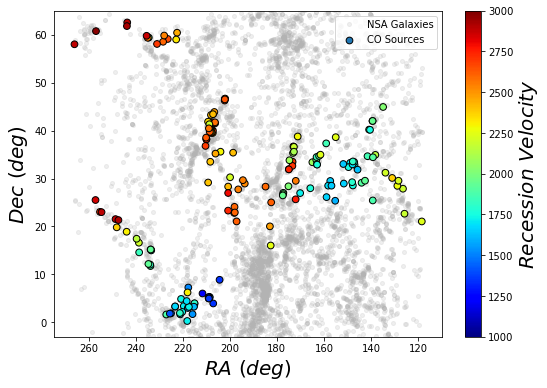

In [49]:
plt.figure(figsize=(8,6))

plt.plot(nsa.RA,nsa.DEC,'ko',c='0.7',markersize=4,alpha=0.2,zorder=1, label='NSA Galaxies')

plt.scatter(nsa.RA[codetect_flag],nsa.DEC[codetect_flag],c=nsa.ZDIST[codetect_flag]*3.e5,s=45,vmin=1000,vmax=3000,cmap='jet',zorder=3,edgecolors='k'
    ,label='CO Sources')
plt.gca().invert_xaxis()
cb=plt.colorbar(fraction=.08)
cb.set_label('$Recession \ Velocity$',size=20)
#plt.axis('equal')
plt.xlabel('$RA  \ (deg)$',fontsize=20)
plt.ylabel('$Dec \ (deg)$',fontsize=20)
plt.ylim(-3,65)
plt.legend(loc='upper right')
plt.savefig('../plots/noao-2019-fig1.eps')

## Plot NUV-r versus stellar mass ##

which galaxies are we targeting with H$\alpha$

## Redo Figure 1 ##

repeat left panel, with CO sources colored by stellar mass

(-3, 65)

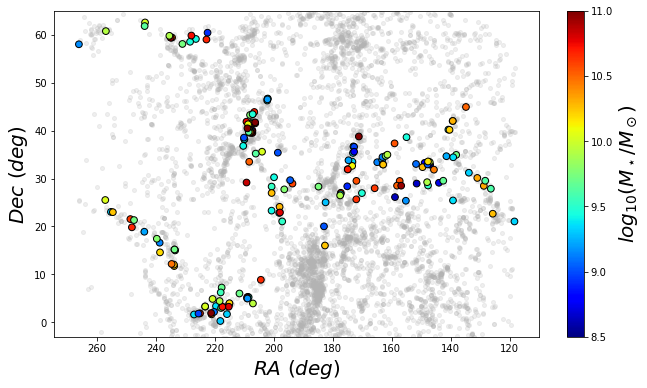

In [39]:
plt.figure(figsize=(10,6))

plt.plot(nsa.RA,nsa.DEC,'ko',c='0.7',markersize=4,alpha=0.2,zorder=1)

plt.scatter(nsa.RA[codetect_flag],nsa.DEC[codetect_flag],c=jmass.MSTAR_50[codetect_flag],s=45,vmin=8.5,vmax=11,cmap='jet',zorder=3,edgecolors='k')
plt.gca().invert_xaxis()
cb=plt.colorbar(fraction=.08)
cb.set_label('$log_{10}(M_\star/M_\odot)$',size=20)
#plt.axis('equal')
plt.xlabel('$RA  \ (deg)$',fontsize=20)
plt.ylabel('$Dec \ (deg)$',fontsize=20)
plt.ylim(-3,65)

In [27]:
260./15

17.333333333333332

In [76]:
ha = fits.getdata('/Users/rfinn/github/Virgo/tables/nsa_Halpha.virgo.fits')
haflag = ha['halpha'] == 1
print(sum(haflag))

39


number of sources for 2018 =  42


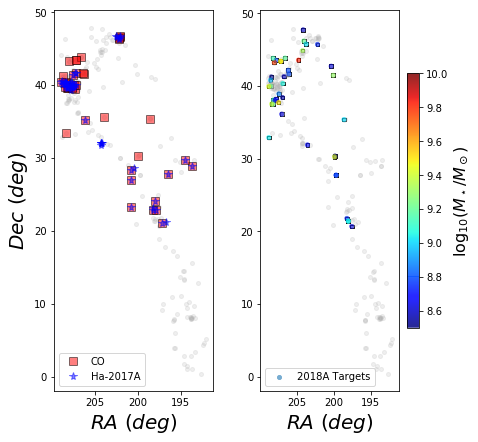

In [74]:

# NGC5353/4 Filament
radec = (nsa.RA > 192.) & (nsa.RA < 209) & (nsa.DEC > 0.) & (nsa.DEC < 50.) 
radec_flag = radec & (nsa.DEC >(2*(nsa.RA - 205.) + 20) ) & (nsa.DEC < (2*(nsa.RA - 205.) + 55))
filament = radec_flag & (nsa.Z*3.e5 >2000.) & (nsa.Z*3.e5 < 3238.)
#plt.scatter(nsa.RA[filament],nsa.DEC[filament],c=nsa.Z[filament]*3.e5,zorder=20,s=20,vmin=1000,vmax=3000,lw=0.5)
xl = np.linspace(196,230,100)
yl = (2*(xl - 205.) + 20)
#plt.plot(xl,yl,'r-')
NGCfilament = filament

fig = plt.figure(figsize=(7,7))
plt.subplots_adjust(hspace=.2,wspace=.3,right=.85)
plt.subplot(1,2,1)

plt.plot(nsa.RA[NGCfilament],nsa.DEC[NGCfilament],'ko',c='0.7',markersize=4,alpha=0.2)
#plt.axis([190,212,18,53])
plt.gca().invert_xaxis()
flag = NGCfilament & codetect_flag
plt.plot(nsa.RA[flag],nsa.DEC[flag],'rs',mfc=None,mec='k',markersize=8,alpha=0.5,label='CO')
plt.plot(nsa.RA[NGCfilament & ha_flag],nsa.DEC[NGCfilament & ha_flag],'b*',mfc=None,mec='b',markersize=8,alpha=0.5,label='Ha-2017A')
plt.xlabel('$RA  \ (deg)$',fontsize=20)
plt.ylabel('$Dec \ (deg)$',fontsize=20)
plt.legend(numpoints=1)
plt.subplot(1,2,2)
plt.plot(nsa.RA[NGCfilament],nsa.DEC[NGCfilament],'ko',c='0.7',markersize=4,alpha=0.2)
#plt.axis([204,212,39,41])
#plt.axis([190,212,18,53])
plt.gca().invert_xaxis()
#plt.plot(nsa.RA[NGCfilament & COflag],nsa.DEC[NGCfilament & COflag],'rs',mfc=None,mec='r',markersize=8,alpha=0.2,label='CO')
#plt.plot(nsa.RA[NGCfilament & ha_flag],nsa.DEC[NGCfilament & ha_flag],'b*',mfc=None,mec='b',markersize=8,alpha=0.2,label='Ha')
plt.xlabel('$RA  \ (deg)$',fontsize=20)
#plt.ylabel('$Dec \ (deg)$',fontsize=20)
plt.legend(numpoints=1)
flag = NGCfilament & (jmass.MSTAR_50 > 8.5) & (jmass.MSTAR_50 < 10) & ~ha_flag & (nsa.SERSIC_BA > .25) & (nsa.DEC > 20)
print 'number of sources for 2018 = ',sum(flag)
plt.scatter(nsa.RA[flag],nsa.DEC[flag],c=jmass.MSTAR_50[flag],zorder=20,s=20,vmin=8.5,vmax=10,lw=0.5,alpha=.6,label='2018A Targets',cmap='jet')
cb=plt.colorbar(fraction=.08)
ra = nsa.RA[flag]
dec = nsa.DEC[flag]
for i in range(len(ra)):
    rect= plt.Rectangle((ra[i]-.25,dec[i]-.25), .5, .5,fill=False, color='k')
    #rect= plt.Rectangle((ra[i]-.25,dec[i]-.25), .5, .5,fill=False, color='k')
    fig.gca().add_artist(rect)
plt.legend(numpoints=1,scatterpoints=1)
cb.set_label('$\log_{10}(M_\star/M_\odot)$',size=16)
plt.savefig('/Users/rfinn/proposals/observing/NOAO2018A/noao2018a-targets.eps')

In [62]:
nsa.NSAID[matchedCO10['NED_name'] == 'NGC2964']

array([136042], dtype=int32)

In [71]:
help(np.genfromtxt)

Help on function genfromtxt in module numpy.lib.npyio:

genfromtxt(fname, dtype=<type 'float'>, comments='#', delimiter=None, skip_header=0, skip_footer=0, converters=None, missing_values=None, filling_values=None, usecols=None, names=None, excludelist=None, deletechars=None, replace_space='_', autostrip=False, case_sensitive=True, defaultfmt='f%i', unpack=None, usemask=False, loose=True, invalid_raise=True, max_rows=None)
    Load data from a text file, with missing values handled as specified.
    
    Each line past the first `skip_header` lines is split at the `delimiter`
    character, and characters following the `comments` character are discarded.
    
    Parameters
    ----------
    fname : file, str, list of str, generator
        File, filename, list, or generator to read.  If the filename
        extension is `.gz` or `.bz2`, the file is first decompressed. Mote
        that generators must return byte strings in Python 3k.  The strings
        in a list or produced by a g